<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Projeto_Mapas_Auto_Organizaveis_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom
from minisom import MiniSom
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot

In [0]:
base = pd.read_csv('/content/sample_data/wines.csv')
X = base.iloc[:, 1:14].values
y = base.iloc[:, 0].values
normalizador = MinMaxScaler(feature_range = (0, 1))
X = normalizador.fit_transform(X) #normalização entre 0 e 1

In [0]:
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)#num_iterations é parecido com epochs

In [0]:
som._weights
som._activation_map
q = som.activation_response(X)

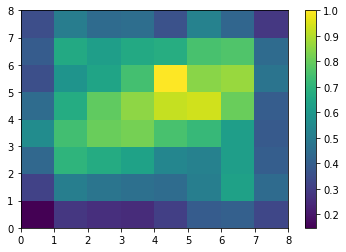

In [5]:
pcolor(som.distance_map().T)# media de distancia de cada um dos neuronios, ou seja o quanto são parecidos
colorbar()

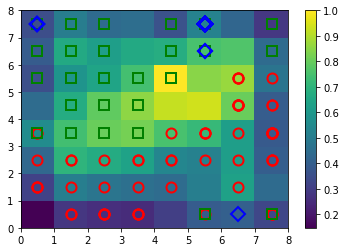

In [6]:
pcolor(som.distance_map().T)
colorbar()
w = som.winner(X[2])
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

for i, x in enumerate(X):
    #print(i)
    #print(x)
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)#posiciona o simbolo no meio do quadrado
  